In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
sys.path.append('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/')
from RF_atomver import *
from VisUtils import *
import pandas as pd
import numpy as np

In [22]:
from matplotlib_venn import venn3, venn2
nek_list = ["2", "3", "5", "9"]
feat_types = ['moe', 'mfp']
samplings = ['scaled', 'UNDER' , 'SMOTE', 'ADASYN']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'

In [23]:
all_dfs = [] 
all_neks = []
for nek in nek_list: 
    if nek in ['2', '9']: 
        bind_inhib =['binding', 'inhibition']
    else: 
        bind_inhib = ['binding']
    for bi in bind_inhib: 
        if bi == 'binding': 
            short = 'bind'
        else: 
            short = 'inhib'  
        this_nek = f'NEK{nek}_{bi}'
        print(this_nek)
        # for feat in feat_types: 
        #     for samp in ['scaled', 'UNDER', 'ADASYN']: 
        df_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{nek}/{short}/'
        # full_df = pd.read_csv(f'{df_path}NEK{nek}_{bi}_{feat}_{samp}_df.csv') 
        full_df = pd.read_csv(f'{df_path}NEK{nek}_{bi}_moe_scaled_df.csv') 
        full_df['NEK'] = this_nek
        all_dfs.append(full_df)
        all_neks.append(this_nek) 
        

NEK2_binding
NEK2_inhibition
NEK3_binding
NEK5_binding
NEK9_binding
NEK9_inhibition


In [24]:
df_dict = {}
for df, nek in zip(all_dfs, all_neks):
    df_dict[nek] = df

    

In [25]:
df_dict['NEK2_binding']

,ASA+_per_atom,ASA-,ASA_H_per_atom,ASA_P,ASA_per_atom,BCUT_PEOE_0,BCUT_PEOE_1,BCUT_PEOE_2,BCUT_PEOE_3,BCUT_SLOGP_0_per_atom,...,vsurf_Wp8,weinerPath,weinerPol_per_atom,zagreb_per_atom,subset,compound_id,base_rdkit_smiles,fold,active,NEK
0,6.171916,-2.880666,-0.242820,-0.138540,3.174018,1.664387,2.956607,-2.776526,-1.873703,-6.030218,...,-0.206969,-1.235610,-0.816892,0.194164,train,kdb_2562,Cn1cnc2c(N)ncnc21,fold4,0,NEK2_binding
1,0.504051,0.725849,-0.489283,1.847024,0.319364,-0.163025,-0.395619,0.682256,0.269110,-0.059029,...,-0.206969,0.257966,-0.011573,-0.539664,train,kdb_3056,CNCc1ccc(-c2cc(-c3nc(-c4ccc(S(=O)(=O)C(C)C)cc4...,fold2,0,NEK2_binding
2,-1.005664,1.857896,-0.732021,1.562579,-0.222465,-0.258641,0.555600,-0.776457,0.794523,0.996309,...,-0.206969,0.769733,1.066145,0.502085,train,kdb_3510,CNC(=O)Nc1ccc2c(c1)CC[C@@]21OC(=O)N(CC(=O)N(Cc...,fold4,0,NEK2_binding
3,-0.272463,0.356568,-0.742466,1.119058,0.391476,0.992658,-0.464873,0.315869,0.916609,0.039975,...,-0.206969,-0.450504,0.540647,1.080537,train,kdb_2948,CC(=O)Nc1ccc2ccn(-c3cc(NC4CC4)n4ncc(C#N)c4n3)c2c1,fold3,0,NEK2_binding
4,1.507075,-0.643926,1.305948,-0.705561,1.121426,1.445349,0.459030,1.731704,-1.692399,-0.232629,...,-0.206969,-0.736191,-0.070246,0.125982,train,kdb_2748,Cc1cccc(-c2nc(Nc3ccncc3)c3ccccc3n2)n1,fold4,0,NEK2_binding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,-0.829305,-0.606676,-0.711927,-0.580871,-1.457042,-1.209951,1.095581,-0.537771,1.347102,0.065689,...,-0.206969,-0.128627,3.562265,1.194907,test,kdb_1627,CN[C@H]1C[C@@H]2O[C@](C)([C@H]1OC)n1c3ccccc3c3...,fold1,1,NEK2_binding
1404,1.325649,-1.222164,2.374258,-1.635889,1.987426,1.693552,-0.893856,0.765541,-1.947318,-2.045763,...,-0.206969,-1.147903,-0.762591,0.125982,test,kdb_2758,c1ccc(-c2ccnc3[nH]ccc23)cc1,fold1,1,NEK2_binding
1405,1.130839,-0.968577,0.678757,-0.691671,0.130626,0.118424,0.656058,-1.451143,-0.473444,0.291278,...,-0.206969,-0.236771,0.214837,-0.364932,test,kdb_2288,COCCOCCOc1cc2ncc3c4ccc(C#N)cc4[nH]c3c2cc1OC,fold1,1,NEK2_binding
1406,-0.073978,-0.955461,-0.432754,-0.659996,-1.040959,-0.678455,-0.542517,0.329226,0.102786,0.353850,...,-0.206969,0.012301,-0.364379,-0.601298,test,kdb_2768,CNC(=O)c1ccccc1Nc1nc(Nc2ccc(N3CCOCC3)cc2)ncc1Cl,fold1,1,NEK2_binding


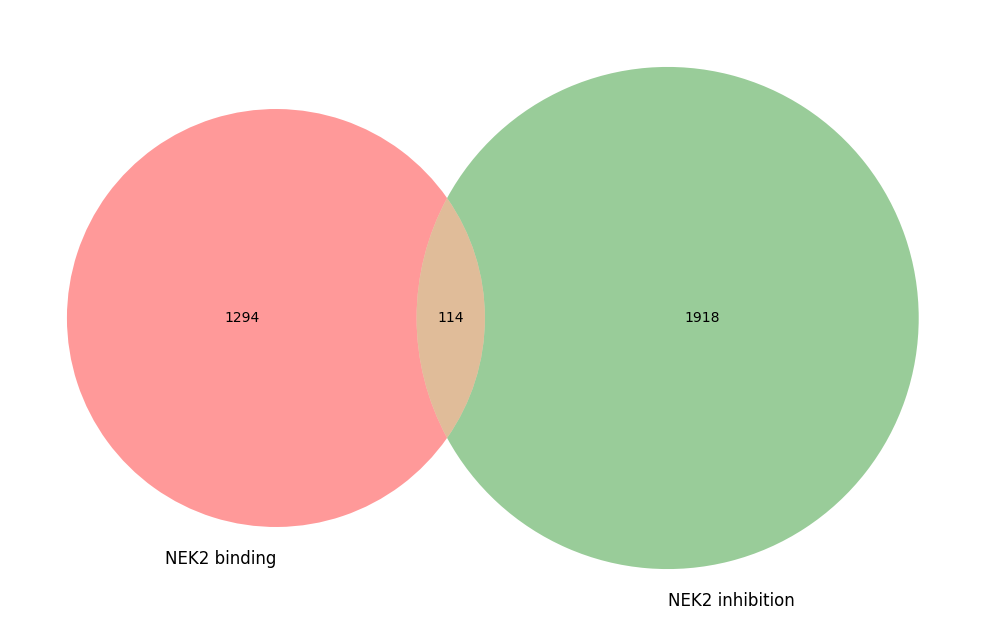

In [26]:
nek2_binding = df_dict['NEK2_binding']
nek2_inhibition = df_dict['NEK2_inhibition']
set1 = set(nek2_binding['base_rdkit_smiles']) 
set2 = set(nek2_inhibition['base_rdkit_smiles']) 
plt.figure(figsize=(20,8))
out = venn2([set1, set2], ('NEK2 binding', 'NEK2 inhibition'))
plt.show()

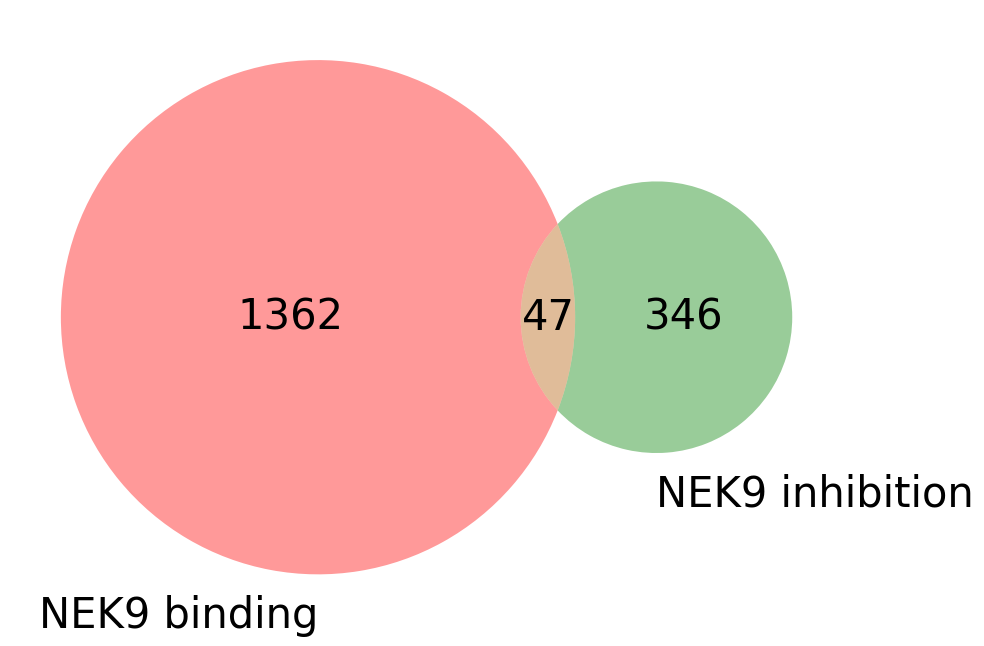

In [29]:
nek9_binding = df_dict['NEK9_binding']
nek9_inhibition = df_dict['NEK9_inhibition']
set3 = set(nek9_binding['base_rdkit_smiles']) 
set4 = set(nek9_inhibition['base_rdkit_smiles']) 
plt.figure(figsize=(20,8))
out = venn2([set3, set4], ('NEK9 binding', 'NEK9 inhibition'))
for text in out.set_labels:
    text.set_fontsize(30)
for text in out.subset_labels:
    text.set_fontsize(30)
plt.show()
plt.show()

In [33]:
neks = list(df_dict.keys())
neks

['NEK2_binding',
 'NEK2_inhibition',
 'NEK3_binding',
 'NEK5_binding',
 'NEK9_binding',
 'NEK9_inhibition']

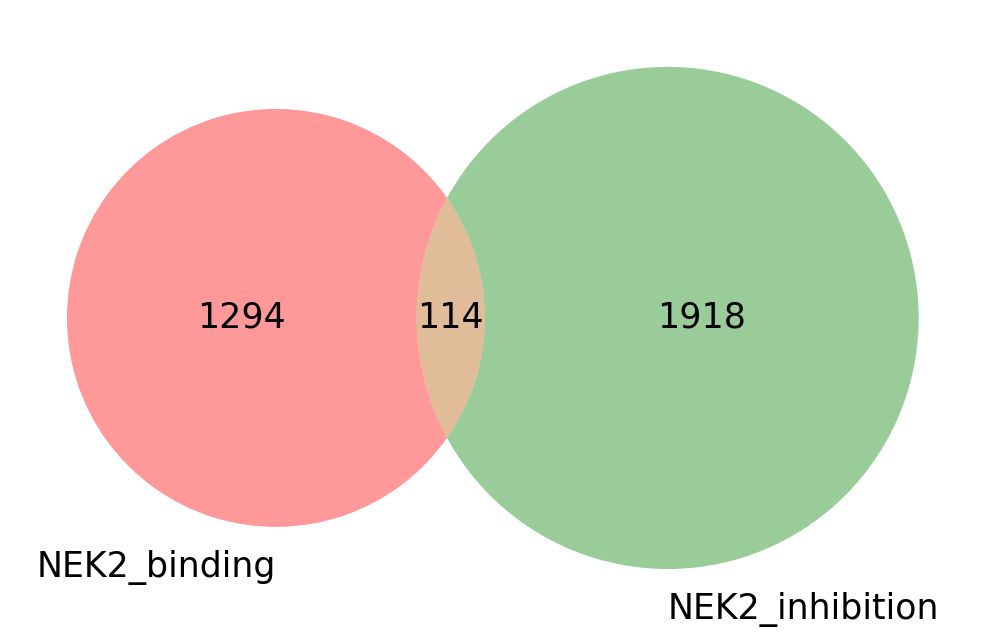

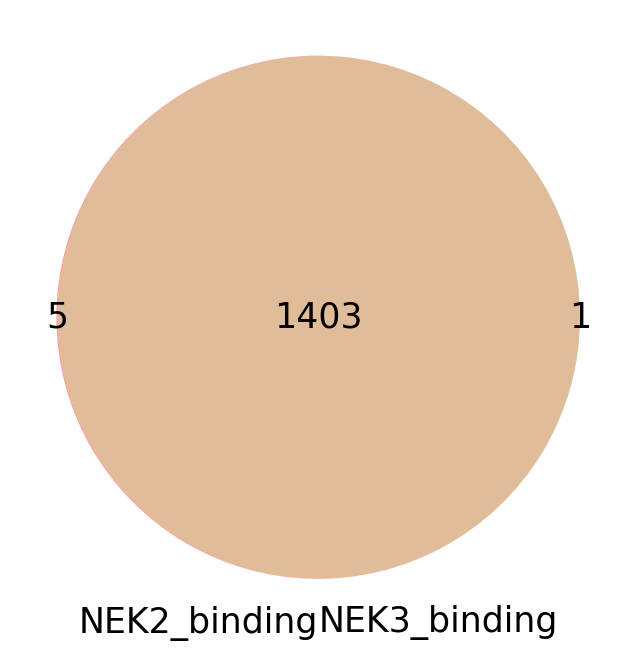

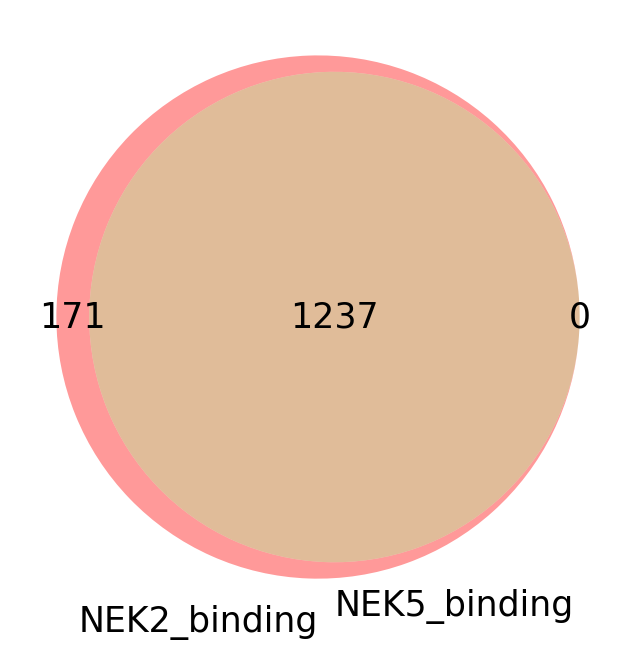

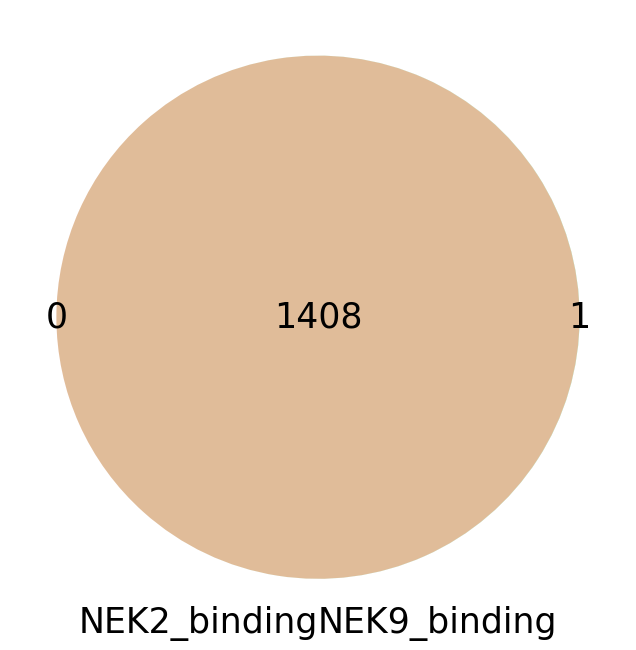

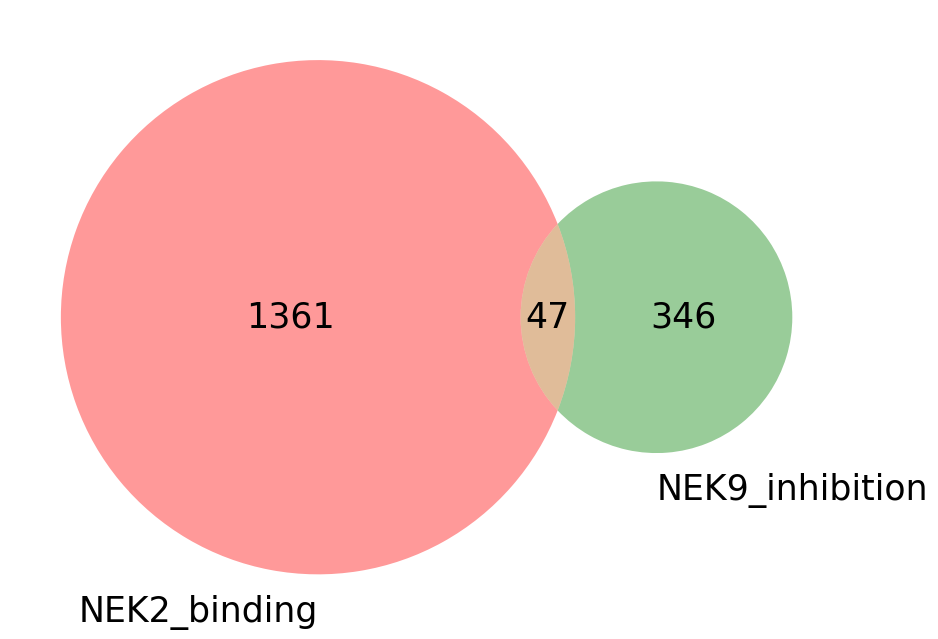

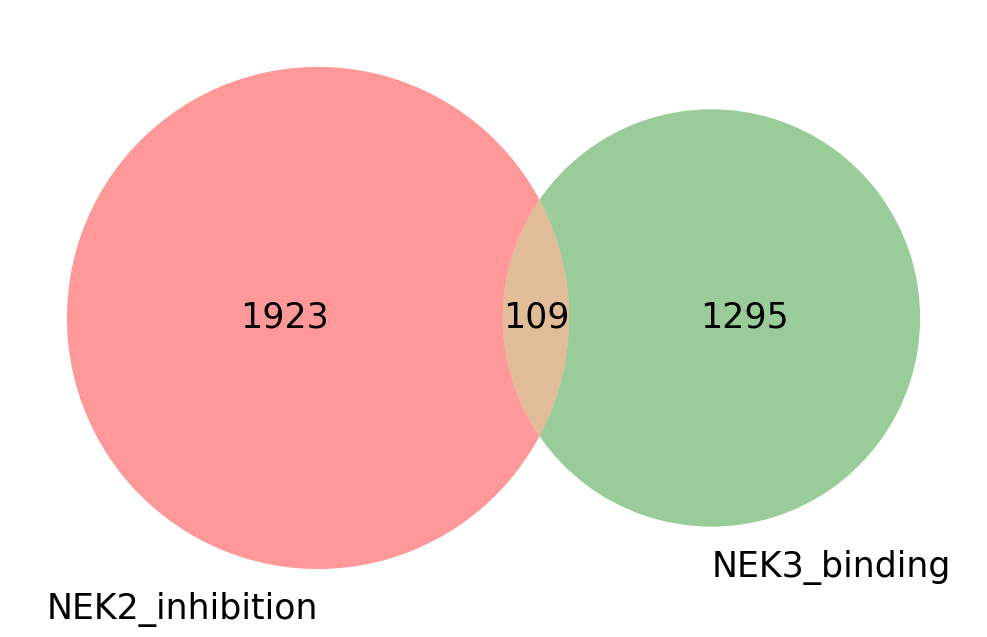

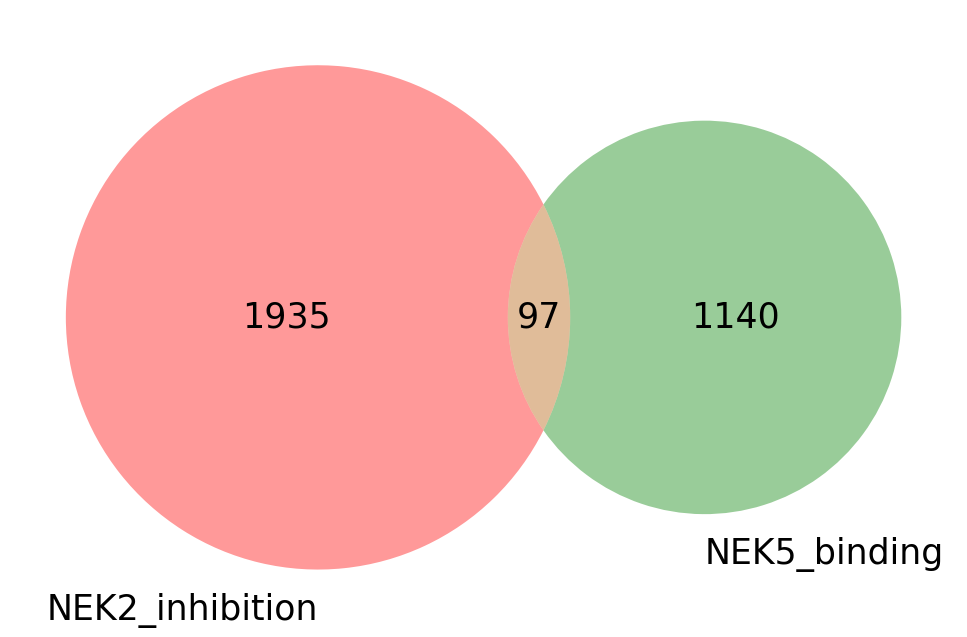

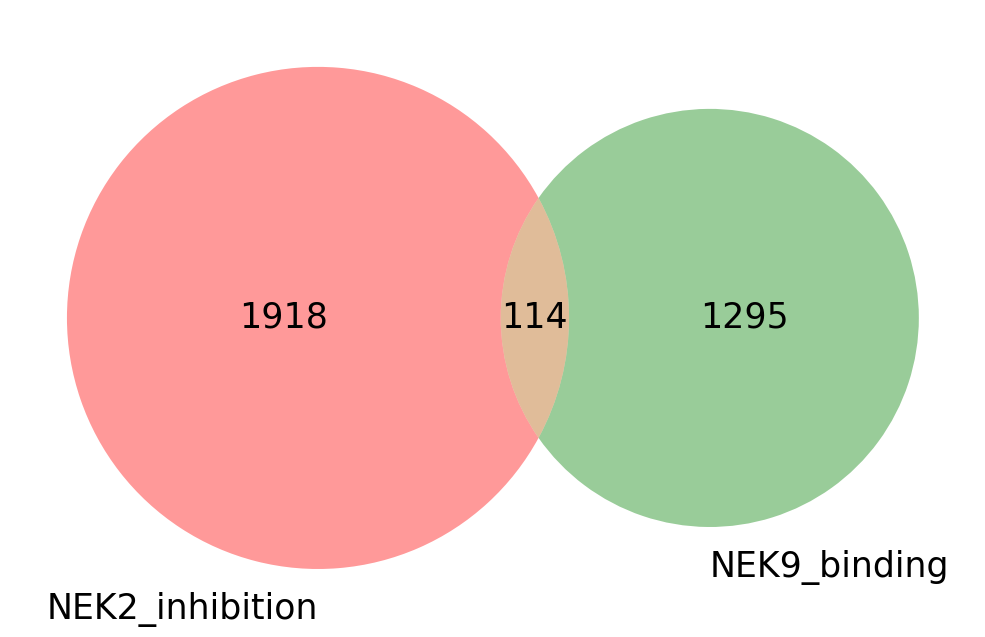

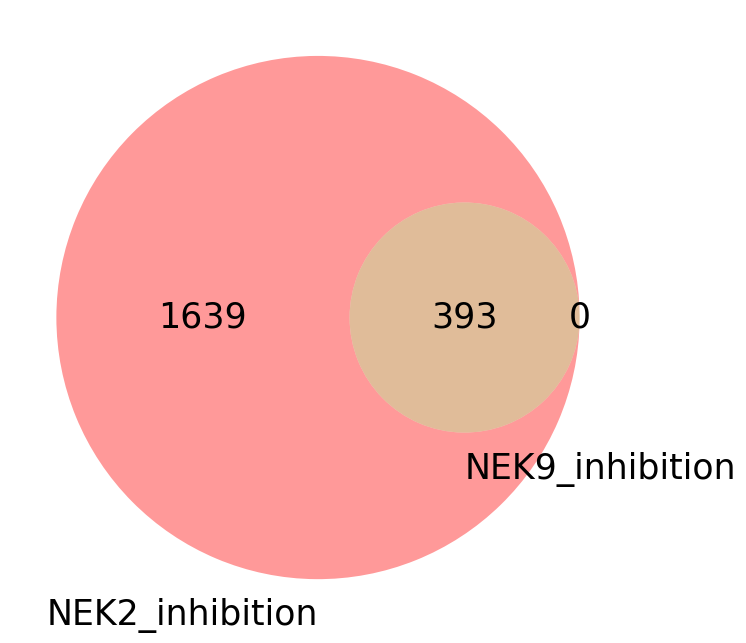

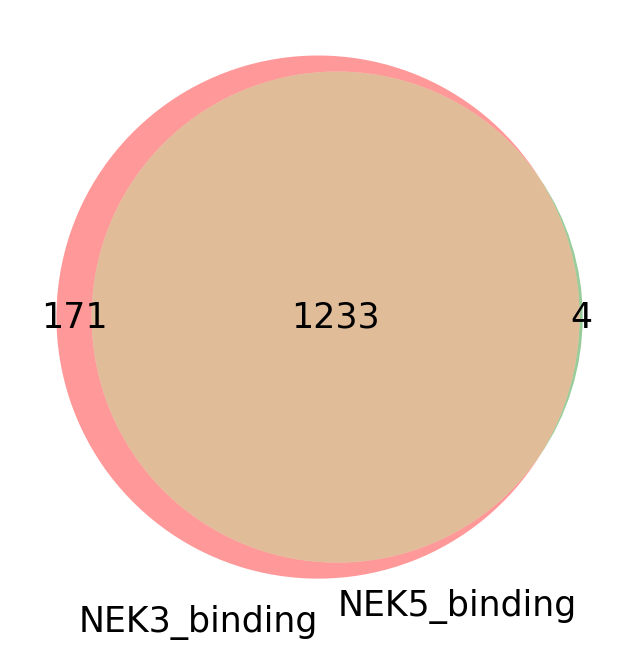

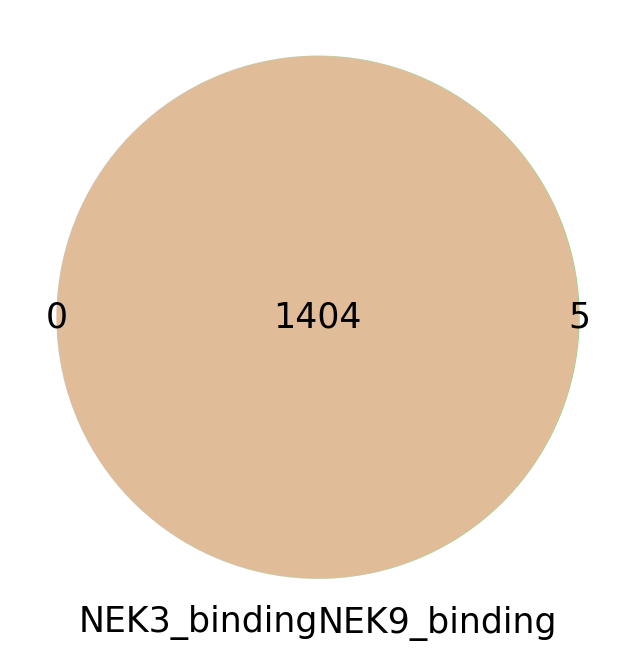

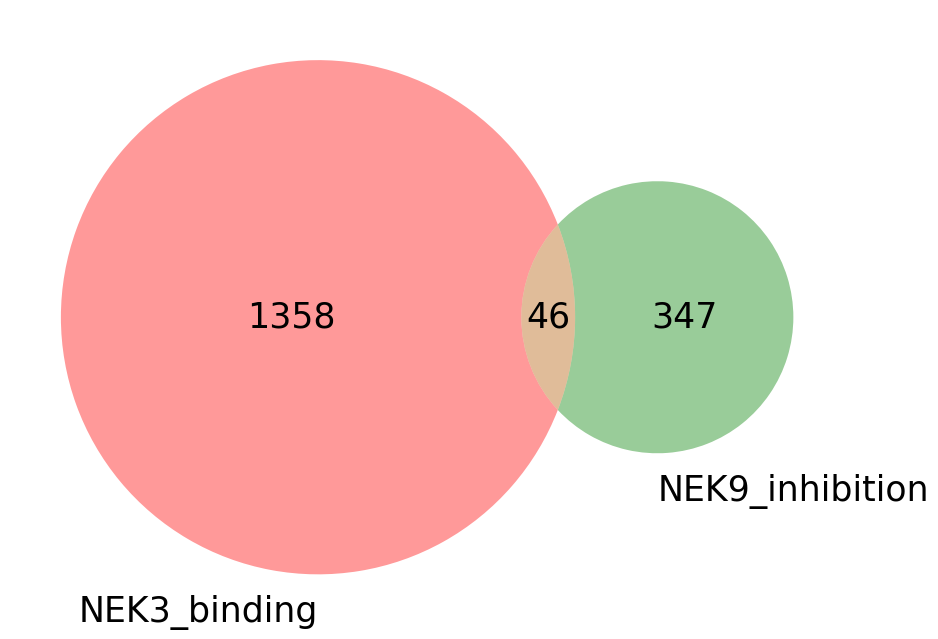

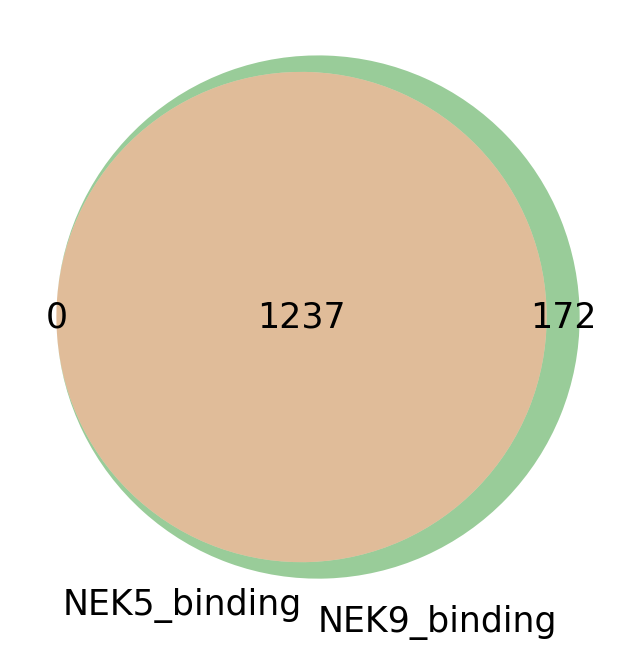

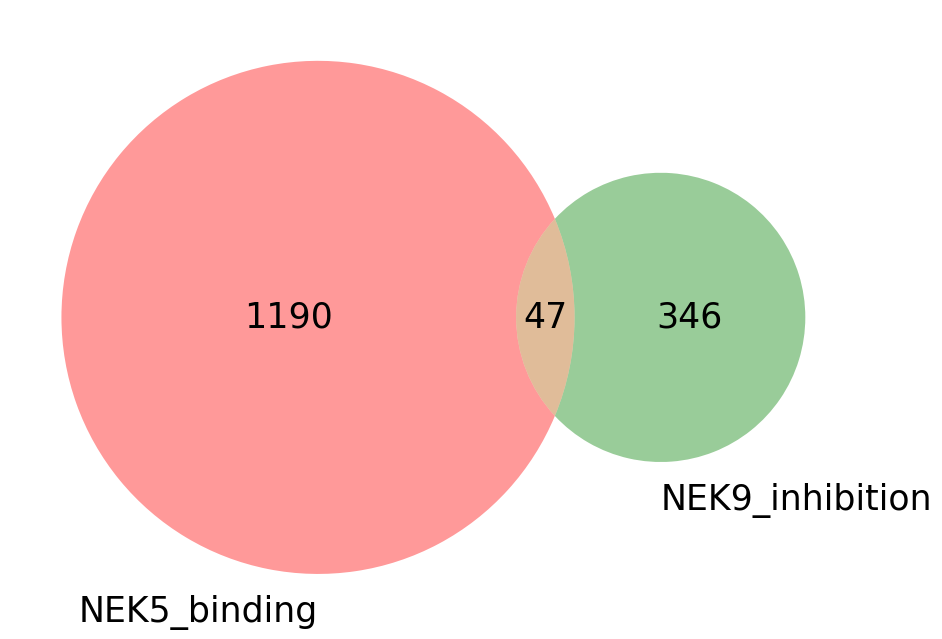

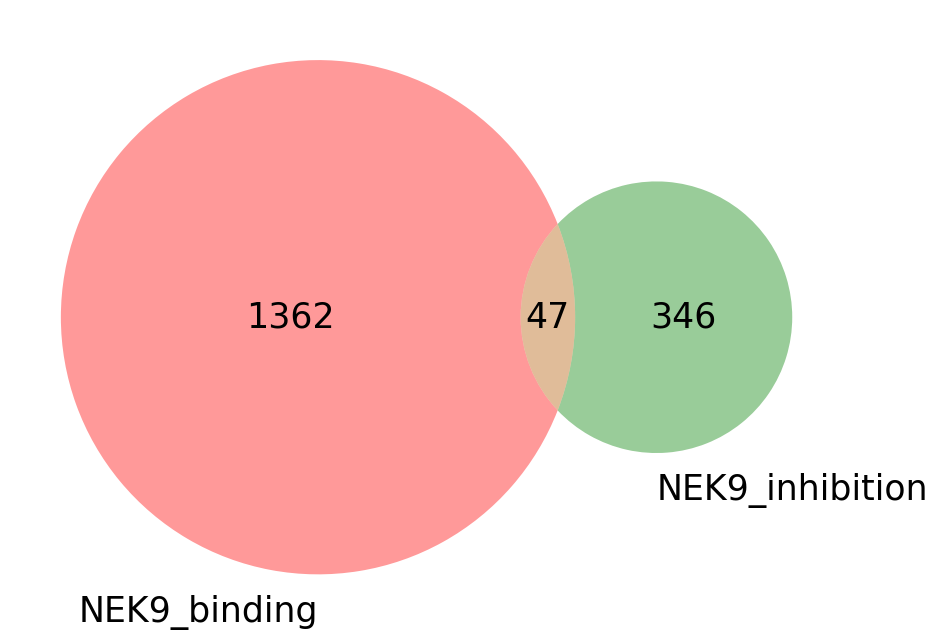

In [36]:
for i in range(len(neks)): 
    for j in range(i+1, len(neks)): 
        this_nek = df_dict[neks[i]]
        that_nek = df_dict[neks[j]] 
       
        set1 = set(this_nek['base_rdkit_smiles']) 
        set2 = set(that_nek['base_rdkit_smiles']) 
        plt.figure(figsize=(20,8))
        out = venn2([set1, set2], (neks[i], neks[j]))
        for text in out.set_labels:
            text.set_fontsize(25)
        for text in out.subset_labels:
            text.set_fontsize(25)
        plt.savefig(f'{neks[i]}_{neks[j]}.png')
        plt.show()


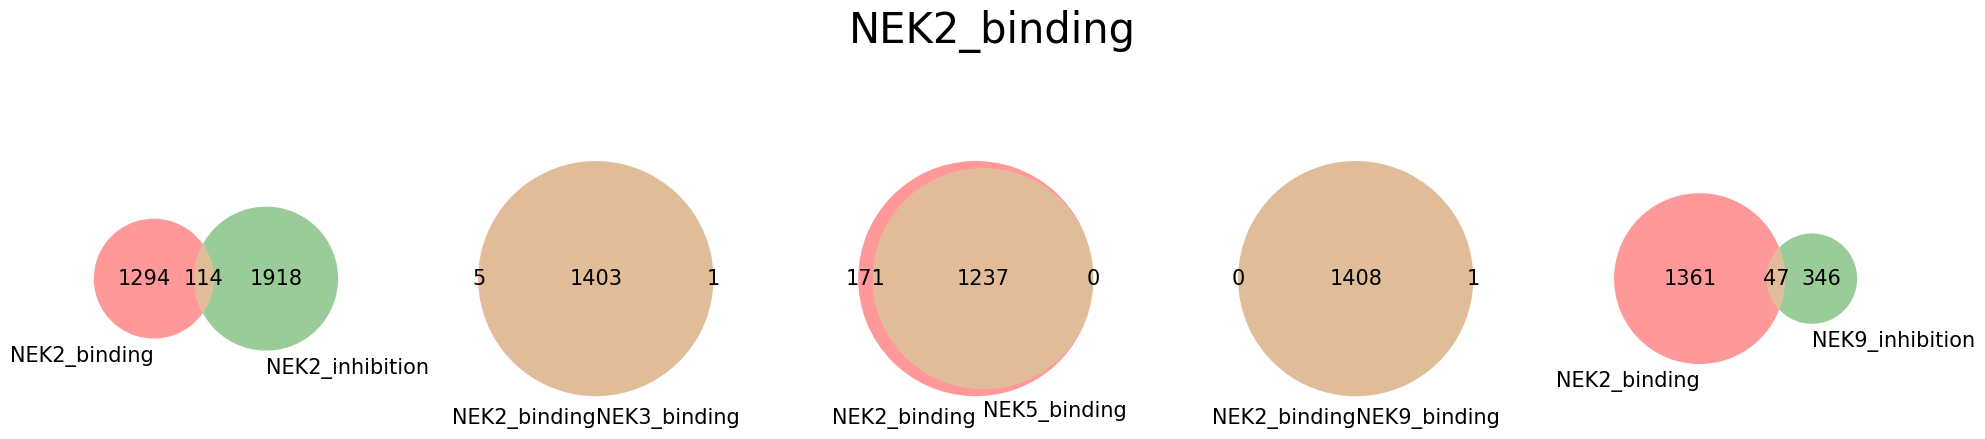

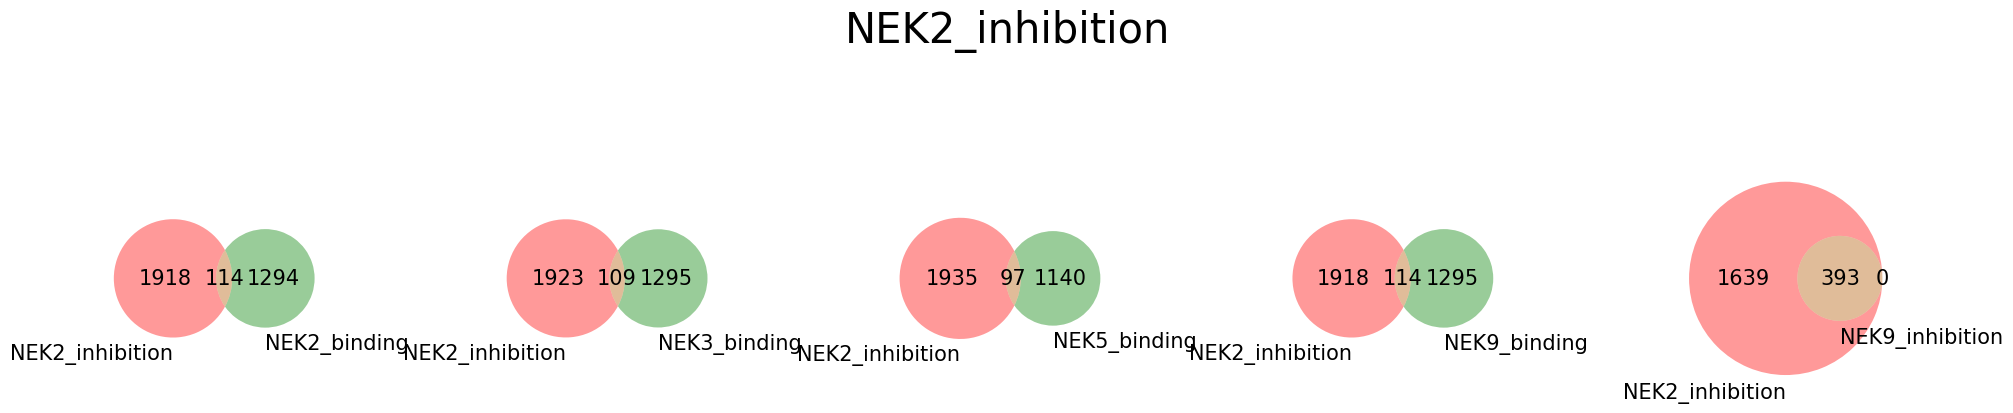

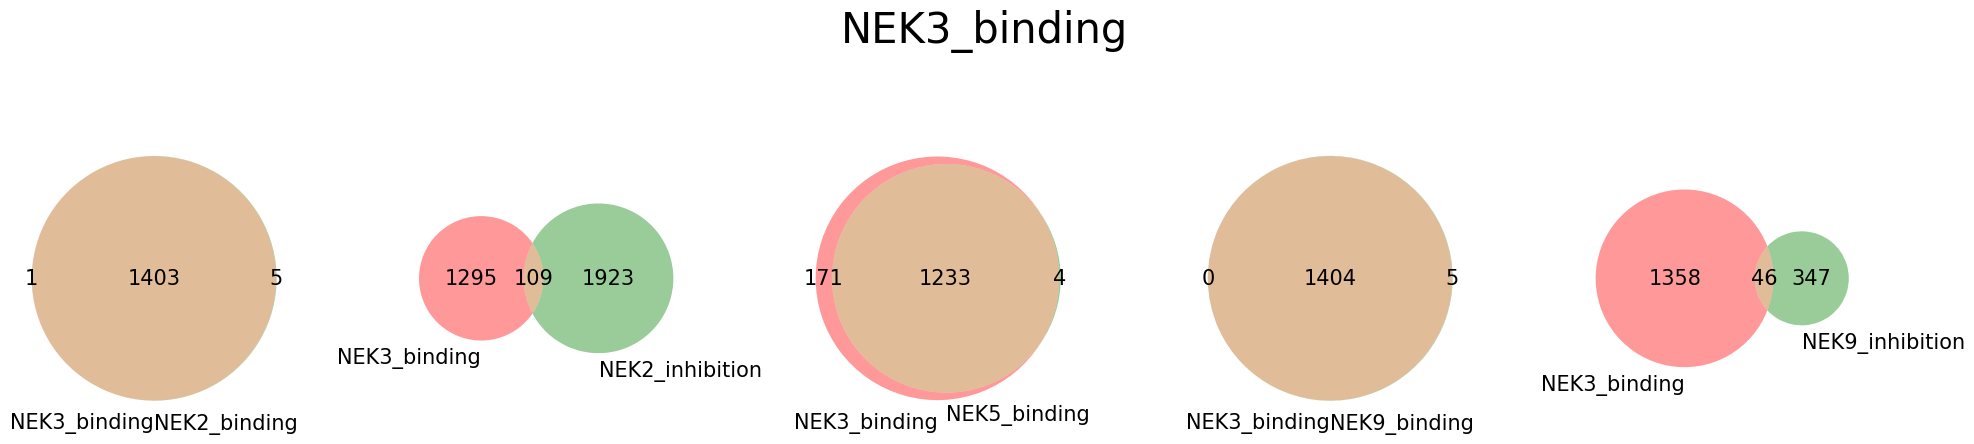

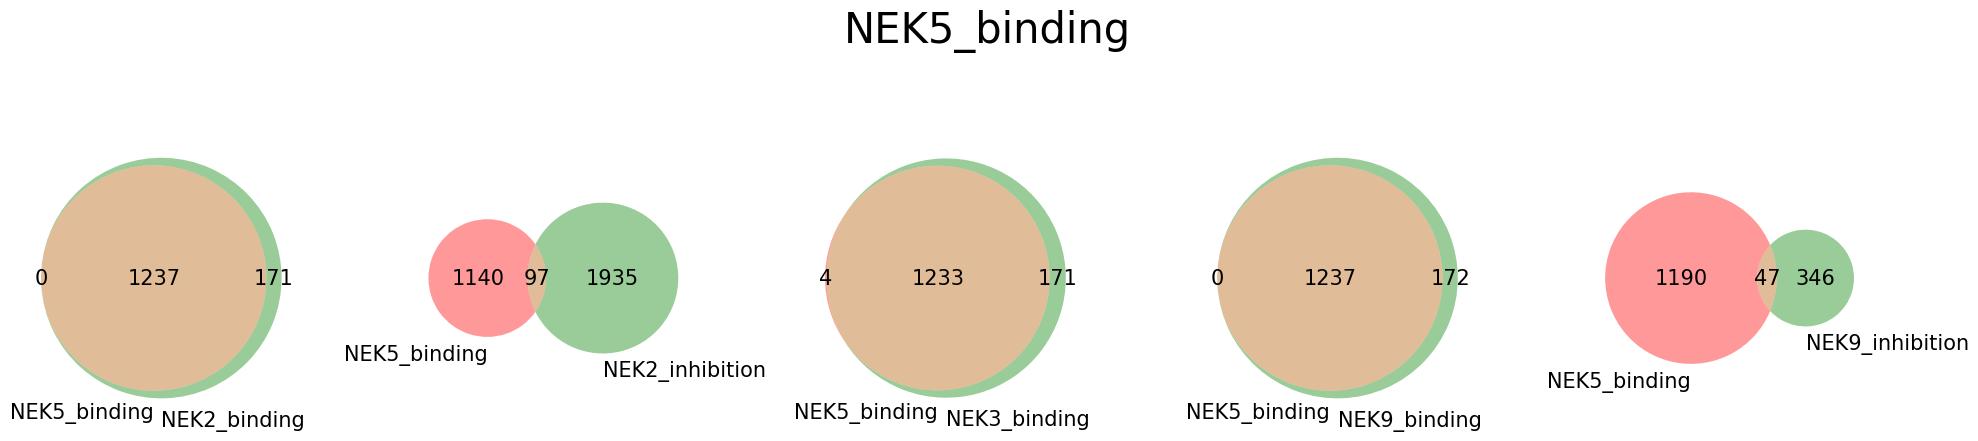

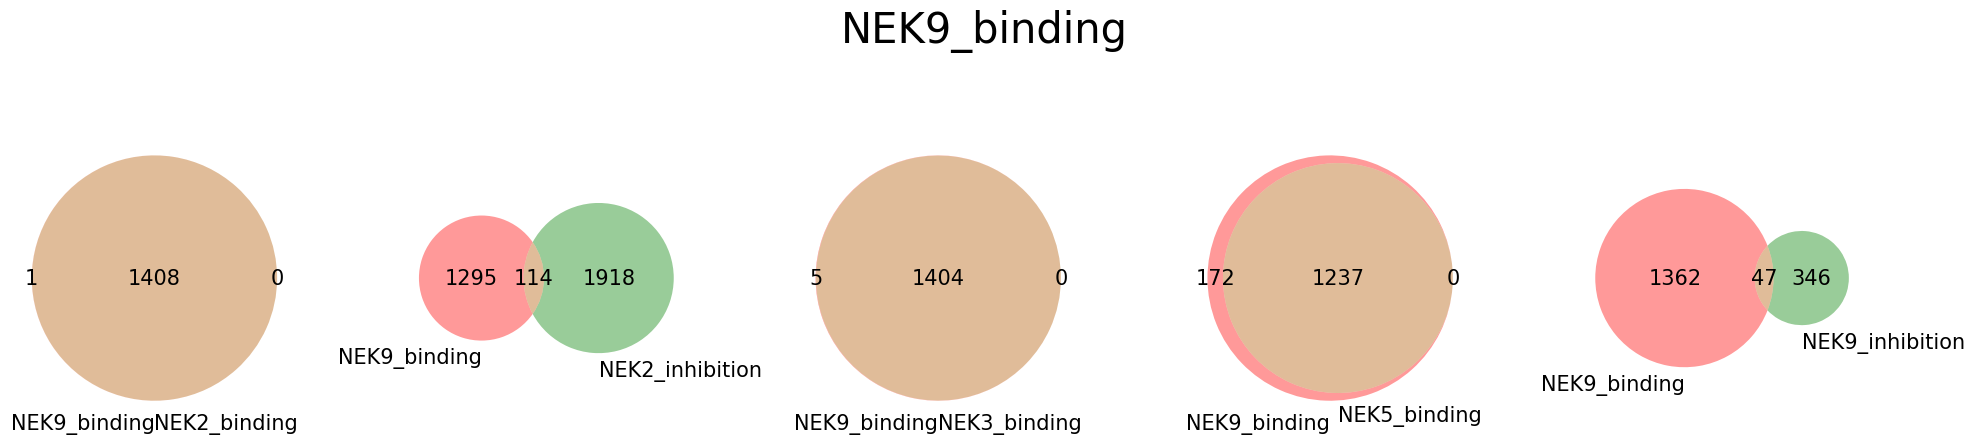

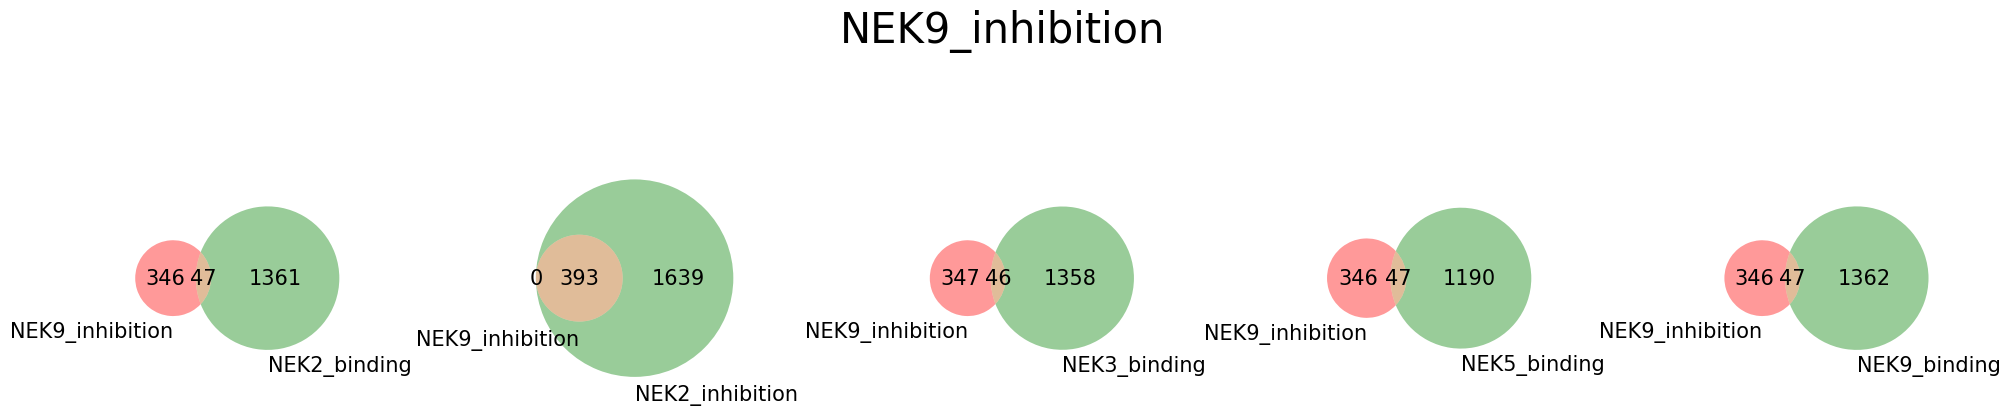

In [46]:
num_neks = len(neks)

for i in range(num_neks):
    curr_nek = neks[i]
    combos_to_plot = [(curr_nek, neks[j]) for j in range(num_neks) if j != i] 
    
    num_inner_plots = len(combos_to_plot) 
    if num_inner_plots == 0:
        continue 
    fig, axs = plt.subplots(1, num_inner_plots, figsize=(20, 8))
    if num_inner_plots == 1:
        axs = [axs] 

    fig.suptitle(f'{curr_nek}', fontsize=30, y=0.8)

    for inner_index, (nek1, nek2) in enumerate(combos_to_plot):
        this_nek = df_dict[nek1]
        that_nek = df_dict[nek2]
        
        set1 = set(this_nek['base_rdkit_smiles']) 
        set2 = set(that_nek['base_rdkit_smiles']) 
        out = venn2([set1, set2], (nek1, nek2), ax=axs[inner_index]) 

        for text in out.set_labels:
            text.set_fontsize(15)
        for text in out.subset_labels:
            text.set_fontsize(15)

    plt.tight_layout()
    plt.savefig(f'subplots/{curr_nek}.png')
    plt.show()

In [ ]:
pos2_df = gen_df.loc[(gen_df['pos2_label']==1)]
pos7_df = gen_df.loc[(gen_df['pos7sub_label']==1)]
set1 = set(pos2_df.smiles.values)
set2 = set(pos7_df.smiles.values)
set3 = set(dis_df.smiles.values)


plt.figure(figsize=(20,8))

out = venn3([set1, set2, set3], ('2-position', '7-position_top', 'discarding'))

for text in out.set_labels:
    text.set_fontsize(30)
for text in out.subset_labels:
    text.set_fontsize(30)
plt.show()